In [0]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
train_data[0] # [1,14,22, ... , 19,178,32]
train_labels[0] # 1
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key, value) in word_index.items()]
)
decode_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]]
)

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
  
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [16]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data=(x_val, y_val))
history_dict = history.history

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.5220 - accuracy: 0.7831 - val_loss: 0.3936 - val_accuracy: 0.8637
Epoch 2/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.3089 - accuracy: 0.9071 - val_loss: 0.3136 - val_accuracy: 0.8784
Epoch 3/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.2223 - accuracy: 0.9276 - val_loss: 0.2906 - val_accuracy: 0.8849
Epoch 4/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.1769 - accuracy: 0.9421 - val_loss: 0.2756 - val_accuracy: 0.8896
Epoch 5/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.1403 - accuracy: 0.9553 - val_loss: 0.2886 - val_accuracy: 0.8863
Epoch 6/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.1144 - accuracy: 0.9651 - val_loss: 0.3076 - val_accuracy: 0.8789
Epoch 7/20
15000/15000 [==============================] - 1s 99us

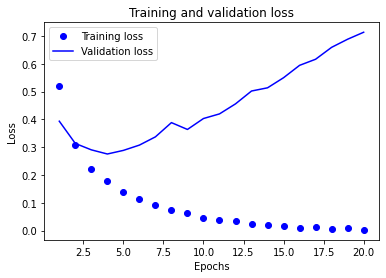

In [17]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 5,
                    batch_size = 512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 2s 101us/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.9071 - val_accuracy: 0.8671
Epoch 2/5
15000/15000 [==============================] - 1s 99us/step - loss: 4.7746e-04 - accuracy: 1.0000 - val_loss: 0.9020 - val_accuracy: 0.8669
Epoch 3/5
15000/15000 [==============================] - 1s 100us/step - loss: 3.4941e-04 - accuracy: 1.0000 - val_loss: 0.9338 - val_accuracy: 0.8672
Epoch 4/5
15000/15000 [==============================] - 1s 99us/step - loss: 0.0050 - accuracy: 0.9988 - val_loss: 0.9956 - val_accuracy: 0.8596
Epoch 5/5
25000/25000 [==============================] - 2s 62us/step
